In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ----- Day 8: Treetop Tree House -----

with open("./data_inputs/day08_input.txt") as f:
    input_raw = f.read()

forest_map = np.array([list(map(int, line)) for line in input_raw.split("\n")])
visibility_map = np.zeros_like(forest_map)

forest_map.shape, visibility_map.shape

((99, 99), (99, 99))

Result 1: 1711


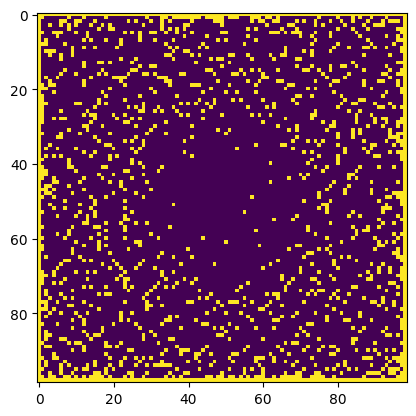

In [3]:
# ---- Part 1 ----

for i in range(forest_map.shape[0]):
    for j in range(forest_map.shape[1]):
        tree = forest_map[i, j]
        visibility_map[i, j] = np.all(tree > forest_map[:i, j]) or \
                                np.all(tree > forest_map[i+1:, j]) or \
                                np.all(tree > forest_map[i, :j]) or \
                                np.all(tree > forest_map[i, j+1:])
        
visible_trees = np.sum(visibility_map)
print("Result 1:", visible_trees)

plt.imshow(visibility_map)
plt.rcParams["figure.figsize"] = (5, 5)

Result 2: 301392


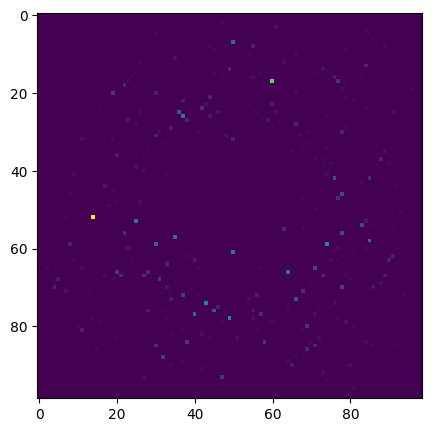

In [6]:
# ---- Part 2 ----

scenic_score_map = np.zeros_like(forest_map)

def visibility_dist(tree, trees_arr):
    if np.all(tree > trees_arr): 
        return len(trees_arr)
    else:
        dist = np.argmax(tree <= trees_arr)
        return dist + 1

for i in range(1, forest_map.shape[0] - 1):
    for j in range(1, forest_map.shape[1] - 1):
        tree = forest_map[i, j]
        scenic_score_map[i, j] = visibility_dist(tree, forest_map[i-1::-1, j]) * \
                                visibility_dist(tree, forest_map[i+1:, j]) * \
                                visibility_dist(tree, forest_map[i, j-1::-1]) * \
                                visibility_dist(tree, forest_map[i, j+1:])
        
max_scenic_score = np.max(scenic_score_map)
print("Result 2:", max_scenic_score)

plt.imshow(scenic_score_map)
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()